# Data Visualisation
In this program i will visualise data in the .csv file which was extracted using github's API calling features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
repos = pd.read_csv('repos_info.csv')
rep = pd.read_csv('repos_info.csv')
commits = pd.read_csv('commits_info.csv')

In [3]:
repos.head(5)

,Id,Name,Description,Created on,Updated on,Owner,License,Includes wiki,Forks count,Issues count,Stars count,Watchers count,Repo URL,Commits URL,Languages URL,Languages
0,303119237,3rd-Year,NaN,2020-10-11T12:46:59Z,2020-12-31T12:35:34Z,abhayKRak3n,NaN,True,0,0,0,0,https://api.github.com/repos/abhayKRak3n/3rd-Year,https://api.github.com/repos/abhayKRak3n/3rd-Y...,https://api.github.com/repos/abhayKRak3n/3rd-Y...,"Jupyter Notebook, Assembly, Haskell, C++, Java..."
1,311667709,abhayKRak3n.github.io,✨ Build a beautiful and simple website in lite...,2020-11-10T13:31:29Z,2020-11-26T22:00:38Z,abhayKRak3n,MIT License,False,0,0,0,0,https://api.github.com/repos/abhayKRak3n/abhay...,https://api.github.com/repos/abhayKRak3n/abhay...,https://api.github.com/repos/abhayKRak3n/abhay...,"HTML, CSS, JavaScript, Ruby"
2,239174943,Algorithms-and-Data-Structures,A collection of programs that I did for my alg...,2020-02-08T17:37:39Z,2020-05-31T15:19:40Z,abhayKRak3n,NaN,True,0,0,0,0,https://api.github.com/repos/abhayKRak3n/Algor...,https://api.github.com/repos/abhayKRak3n/Algor...,https://api.github.com/repos/abhayKRak3n/Algor...,Java
3,243117863,ArmAssembly,Collection of programs I made in Arm assembly ...,2020-02-25T22:37:15Z,2020-11-21T12:38:17Z,abhayKRak3n,NaN,True,0,0,0,0,https://api.github.com/repos/abhayKRak3n/ArmAs...,https://api.github.com/repos/abhayKRak3n/ArmAs...,https://api.github.com/repos/abhayKRak3n/ArmAs...,"Assembly, HTML, Makefile"
4,325843969,GithubAPI-DataVisualisation,NaN,2020-12-31T17:17:56Z,2020-12-31T17:25:05Z,abhayKRak3n,NaN,True,0,0,0,0,https://api.github.com/repos/abhayKRak3n/Githu...,https://api.github.com/repos/abhayKRak3n/Githu...,https://api.github.com/repos/abhayKRak3n/Githu...,Jupyter Notebook


In [4]:
repos.describe()

,Id,Forks count,Issues count,Stars count,Watchers count
count,1.100000e+01,11.0,11.0,11.0,11.0
mean,2.684869e+08,0.0,0.0,0.0,0.0
std,3.388871e+07,0.0,0.0,0.0,0.0
min,2.250414e+08,0.0,0.0,0.0,0.0
25%,2.411499e+08,0.0,0.0,0.0,0.0
50%,2.649566e+08,0.0,0.0,0.0,0.0
75%,2.915576e+08,0.0,0.0,0.0,0.0
max,3.258440e+08,0.0,0.0,0.0,0.0


In [5]:
commits.head(5)

,Repo Id,Commit Id,Date,Message
0,303119237,0a5d93ffa88dc4872a15283c144606cc72ff9229,2020-12-31T12:35:31Z,added ex02
1,303119237,b071c20430c3e1eeabd60059a34d5573237475e0,2020-12-31T12:33:39Z,Delete proj.txt
2,303119237,46013efa52cb2129dbbe4ecfee3bdff270ca2b0c,2020-12-14T17:50:33Z,added info man project
3,303119237,cc8d42bc6e98351b2beb9f9c4d8bcf96caaba7b1,2020-12-14T15:02:14Z,added task4 part 1
4,303119237,435c2c2c334327185241ae8c1d21d9762cb45759,2020-12-09T17:41:44Z,temp addition


In [6]:
commits.describe()

,Repo Id
count,9.010000e+02
mean,3.068031e+08
std,1.671653e+07
min,2.250414e+08
25%,3.116677e+08
50%,3.116677e+08
75%,3.116677e+08
max,3.258440e+08


## Graph for commits per repository

In [7]:
#commits per repo
commits_count = pd.DataFrame(pd.merge(repos, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())
commits_count.columns = ['Id', 'Commits count']

In [8]:
#combine repos with commits count dataset
repos = pd.merge(repos, commits_count, on = 'Id')

Text(0.5, 1.0, 'Commits per repository')

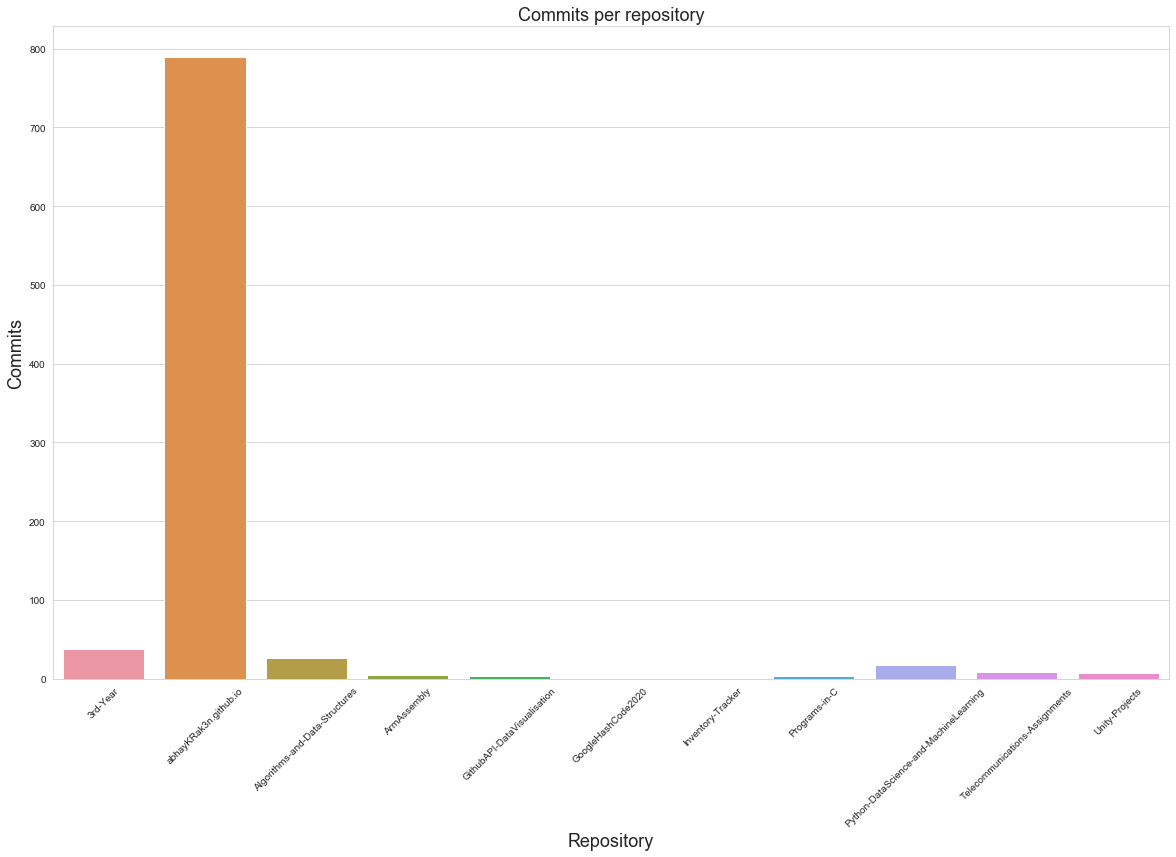

In [9]:
plt.figure(figsize = (20, 12))
sns.set_style("whitegrid")
sns.barplot(repos['Name'], repos['Commits count'])
plt.xticks(rotation = 45)
plt.xlabel("Repository", fontsize = 18)
plt.ylabel("Commits", fontsize = 18)
plt.title("Commits per repository", fontsize = 18)

Since the commit count of the repository with the highest commits is disproportionate with the other repositories, i will drop it and make anothter graph.

In [22]:
rep.drop([1],inplace=True)
commits_count2 = pd.DataFrame(pd.merge(rep, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())
commits_count2.columns = ['Id', 'Commits count']
rep = pd.merge(rep, commits_count2, on = 'Id')

Text(0.5, 1.0, 'Commits per repository (without forked repository)')

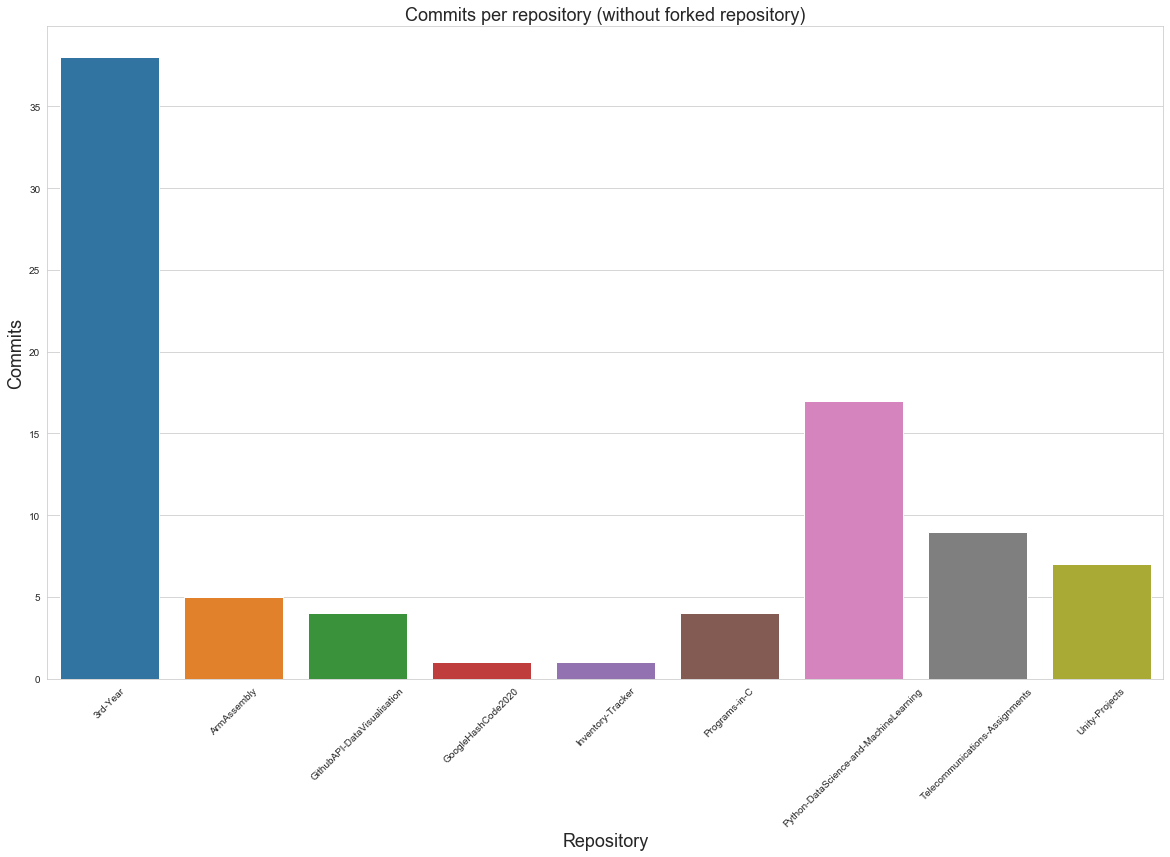

In [23]:
plt.figure(figsize = (20, 12))
sns.barplot(rep['Name'], rep['Commits count'])
plt.xticks(rotation = 45)
plt.xlabel("Repository", fontsize = 18)
plt.ylabel("Commits", fontsize = 18)
plt.title("Commits per repository (without forked repository)", fontsize = 18)

## Graph for most popular languages

In [24]:
listOfLang = []
for languages in repos['Languages']:
    if type(languages) == str:
        for language in languages.split(','):
            listOfLang.append(language.strip())

Text(0.5, 1.0, 'Distribution of languages in all repositories')

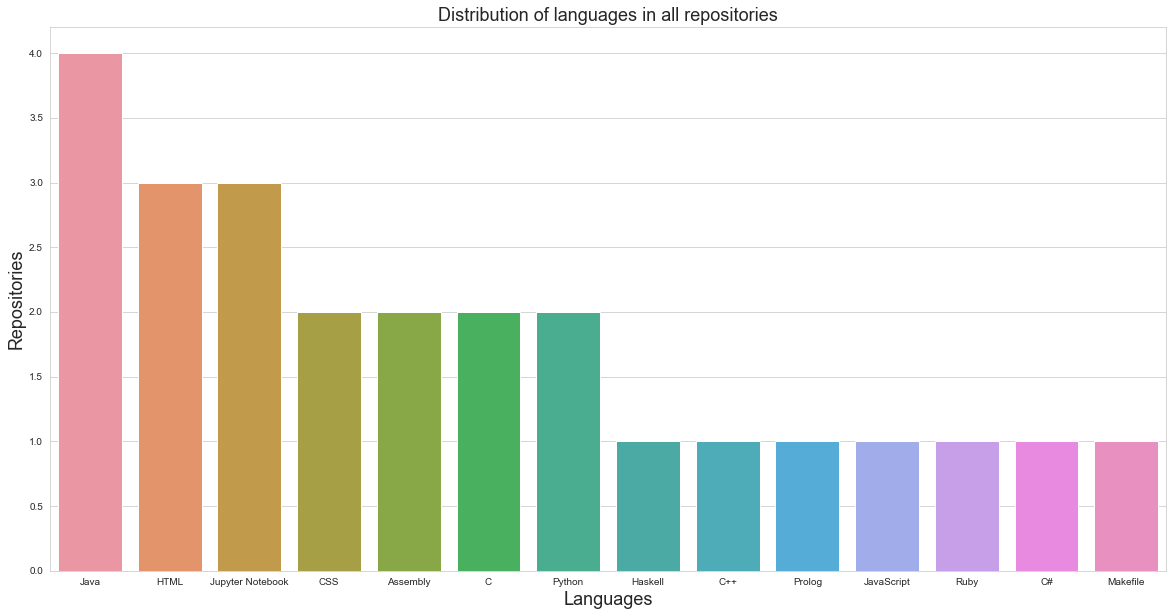

In [25]:
count = pd.Series(listOfLang).value_counts()

plt.figure(figsize = (20, 10))
sns.barplot(count.index, count.values)
plt.xlabel("Languages", fontsize = 18)
plt.xticks(rotation = 0)
plt.ylabel("Repositories", fontsize = 18)
plt.title("Distribution of languages in all repositories", fontsize = 18)

## Commits in each year

In [26]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

Text(0.5, 1.0, 'Commits per year')

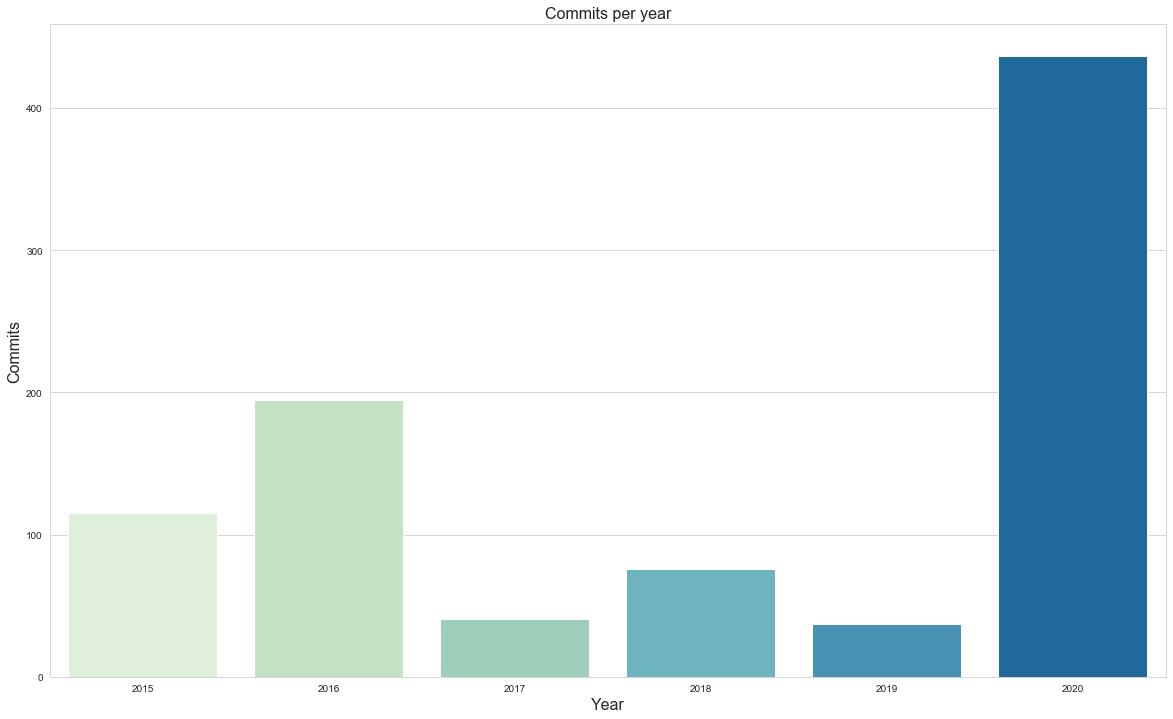

In [27]:
plt.figure(figsize = (20, 12))
sns.barplot(yearly_stats.index, yearly_stats.values,palette="GnBu")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per year", fontsize = 16)

Keep in mind that some of these commits include forked repositories